In [1]:
# Data reading 
import pandas as pd 

# Array math 
import numpy as np

# Dates 
import datetime

# Ploting 
import matplotlib.pyplot as plt 

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Dense, Dropout
from keras import losses

In [2]:
# Downloading data 
!python3 dataDownload.py

# Creating tidy data
!python3 createTidyData.py

Read municipality data in 0.69 seconds
Rows read: 13972
Read patient data in 1.12 seconds
Rows read: 36876
Data saved in data/2020-11-18


In [3]:
# Reading the data 
d = pd.read_csv('data/tidy_data.csv')

# Sorting by date 
d['day'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in d['day']]
d.sort_values('day', inplace=True)

In [4]:
# Saving the last row for prediction 
xtest = d.iloc[-1]

In [5]:
# Extracting the Y column
Y = d['is_covid'].values.tolist()

# Lagging all the data 
d = d.shift(1)
d['Y'] = Y

# Droping the first row 
d = d.drop(0)
d.reset_index(inplace=True, drop=True)

In [6]:
# Defining how many last day data to use in validation 
n_last = 0

# Spliting to training and validation sets 
validation = d.tail(n_last)
train = d[~d.index.isin(validation.index)]

In [7]:
# Creating X and Y matrices for deep learning 
X, Y = train.drop(['day', 'Y'], axis=1), train['Y']
Xval, Yval = validation.drop(['day', 'Y'], axis=1), validation['Y']

In [8]:
print(f'Input dimension: {X.shape}')

Input dimension: (251, 217)


In [9]:
X.tail()

,is_covid,is_cured-0-9Moteris,is_cured-0-9Vyras,is_cured-10-19Moteris,is_cured-10-19Vyras,is_cured-100-109Moteris,is_cured-100-109Vyras,is_cured-120-129Moteris,is_cured-20-29Moteris,is_cured-20-29Vyras,...,is_treated-90-99Vyras,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,tests_total,is_quarantine
246,1559.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12300.0,1.0
247,2060.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14024.0,1.0
248,1530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14236.0,1.0
249,1372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8962.0,1.0
250,1150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6224.0,1.0


In [10]:
Y.tail()

246    2060
247    1530
248    1372
249    1150
250     966
Name: Y, dtype: int64

In [11]:
# Input shape
inputRegression = Input(shape=(X.shape[1], ))

# Adding one output linear neuron
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 217)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 218       
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Initiating the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

# Fitting the model
history = model.fit(X, Y, epochs = 600, batch_size=32, validation_data=(Xval, Yval))

Epoch 1/600
8/8 [==============================] - 0s 4ms/step - loss: 268.9059
Epoch 2/600
8/8 [==============================] - 0s 2ms/step - loss: 265.2658
Epoch 3/600
8/8 [==============================] - 0s 2ms/step - loss: 261.4477
Epoch 4/600
8/8 [==============================] - 0s 2ms/step - loss: 257.7747
Epoch 5/600
8/8 [==============================] - 0s 2ms/step - loss: 254.1368
Epoch 6/600
8/8 [==============================] - 0s 2ms/step - loss: 250.3220
Epoch 7/600
8/8 [==============================] - 0s 2ms/step - loss: 246.7902
Epoch 8/600
8/8 [==============================] - 0s 1ms/step - loss: 242.9460
Epoch 9/600
8/8 [==============================] - 0s 2ms/step - loss: 239.2947
Epoch 10/600
8/8 [==============================] - 0s 2ms/step - loss: 235.5872
Epoch 11/600
8/8 [==============================] - 0s 2ms/step - loss: 231.8680
Epoch 12/600
8/8 [==============================] - 0s 2ms/step - loss: 228.1609
Epoch 13/600
8/8 [===================

8/8 [==============================] - 0s 2ms/step - loss: 133.2804
Epoch 103/600
8/8 [==============================] - 0s 2ms/step - loss: 133.1011
Epoch 104/600
8/8 [==============================] - 0s 2ms/step - loss: 132.9246
Epoch 105/600
8/8 [==============================] - 0s 2ms/step - loss: 132.7327
Epoch 106/600
8/8 [==============================] - 0s 2ms/step - loss: 132.5522
Epoch 107/600
8/8 [==============================] - 0s 2ms/step - loss: 132.3675
Epoch 108/600
8/8 [==============================] - 0s 3ms/step - loss: 132.1900
Epoch 109/600
8/8 [==============================] - 0s 2ms/step - loss: 132.0107
Epoch 110/600
8/8 [==============================] - 0s 2ms/step - loss: 131.8079
Epoch 111/600
8/8 [==============================] - 0s 2ms/step - loss: 131.6369
Epoch 112/600
8/8 [==============================] - 0s 2ms/step - loss: 131.4569
Epoch 113/600
8/8 [==============================] - 0s 2ms/step - loss: 131.2803
Epoch 114/600
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 114.8721
Epoch 203/600
8/8 [==============================] - 0s 2ms/step - loss: 114.6776
Epoch 204/600
8/8 [==============================] - 0s 2ms/step - loss: 114.5074
Epoch 205/600
8/8 [==============================] - 0s 2ms/step - loss: 114.3144
Epoch 206/600
8/8 [==============================] - 0s 2ms/step - loss: 114.1421
Epoch 207/600
8/8 [==============================] - 0s 2ms/step - loss: 113.9669
Epoch 208/600
8/8 [==============================] - 0s 2ms/step - loss: 113.7574
Epoch 209/600
8/8 [==============================] - 0s 2ms/step - loss: 113.5848
Epoch 210/600
8/8 [==============================] - 0s 2ms/step - loss: 113.4377
Epoch 211/600
8/8 [==============================] - 0s 2ms/step - loss: 113.2089
Epoch 212/600
8/8 [==============================] - 0s 2ms/step - loss: 113.0236
Epoch 213/600
8/8 [==============================] - 0s 2ms/step - loss: 112.8381
Epoch 214/600
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 96.3026
Epoch 303/600
8/8 [==============================] - 0s 2ms/step - loss: 96.1213
Epoch 304/600
8/8 [==============================] - 0s 2ms/step - loss: 95.9438
Epoch 305/600
8/8 [==============================] - 0s 2ms/step - loss: 95.7524
Epoch 306/600
8/8 [==============================] - 0s 2ms/step - loss: 95.5686
Epoch 307/600
8/8 [==============================] - 0s 2ms/step - loss: 95.3704
Epoch 308/600
8/8 [==============================] - 0s 2ms/step - loss: 95.2129
Epoch 309/600
8/8 [==============================] - 0s 3ms/step - loss: 95.0094
Epoch 310/600
8/8 [==============================] - 0s 2ms/step - loss: 94.8329
Epoch 311/600
8/8 [==============================] - 0s 2ms/step - loss: 94.6529
Epoch 312/600
8/8 [==============================] - 0s 3ms/step - loss: 94.4540
Epoch 313/600
8/8 [==============================] - 0s 3ms/step - loss: 94.2644
Epoch 314/600
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 77.6414
Epoch 404/600
8/8 [==============================] - 0s 2ms/step - loss: 77.4584
Epoch 405/600
8/8 [==============================] - 0s 2ms/step - loss: 77.2723
Epoch 406/600
8/8 [==============================] - 0s 2ms/step - loss: 77.0758
Epoch 407/600
8/8 [==============================] - 0s 2ms/step - loss: 76.9121
Epoch 408/600
8/8 [==============================] - 0s 2ms/step - loss: 76.7311
Epoch 409/600
8/8 [==============================] - 0s 3ms/step - loss: 76.5229
Epoch 410/600
8/8 [==============================] - 0s 2ms/step - loss: 76.3567
Epoch 411/600
8/8 [==============================] - 0s 2ms/step - loss: 76.1672
Epoch 412/600
8/8 [==============================] - 0s 2ms/step - loss: 75.9890
Epoch 413/600
8/8 [==============================] - 0s 2ms/step - loss: 75.8049
Epoch 414/600
8/8 [==============================] - 0s 2ms/step - loss: 75.6290
Epoch 415/600
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 62.2160
Epoch 505/600
8/8 [==============================] - 0s 3ms/step - loss: 62.1012
Epoch 506/600
8/8 [==============================] - 0s 2ms/step - loss: 61.9814
Epoch 507/600
8/8 [==============================] - 0s 2ms/step - loss: 61.8383
Epoch 508/600
8/8 [==============================] - 0s 2ms/step - loss: 61.7241
Epoch 509/600
8/8 [==============================] - 0s 2ms/step - loss: 61.6029
Epoch 510/600
8/8 [==============================] - 0s 2ms/step - loss: 61.4678
Epoch 511/600
8/8 [==============================] - 0s 2ms/step - loss: 61.3308
Epoch 512/600
8/8 [==============================] - 0s 2ms/step - loss: 61.2228
Epoch 513/600
8/8 [==============================] - 0s 2ms/step - loss: 61.0950
Epoch 514/600
8/8 [==============================] - 0s 2ms/step - loss: 60.9544
Epoch 515/600
8/8 [==============================] - 0s 2ms/step - loss: 60.8364
Epoch 516/600
8/8 [=======================

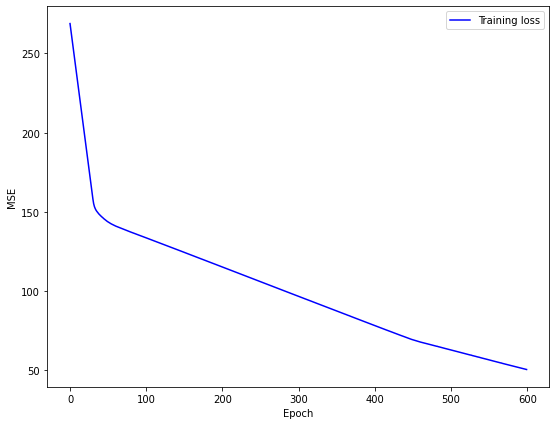

In [14]:
mse = history.history['loss']
val_loss = history.history.get('val_loss')

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [15]:
# Preparing input for the model 
x = xtest[X.columns].values.astype('float32')
x = np.reshape(x, (1, X.shape[1]))

# Predicting 
model.predict(x)

array([[677.9545]], dtype=float32)

In [16]:
# Extracting model weights
w = [x[0] for x in model.weights[0].numpy()]

In [17]:
dcoef = pd.DataFrame({'feature': X.columns, 'w': w})
dcoef.sort_values('w', inplace=True)

In [18]:
dcoef

,feature,w
23,is_cured-90-99Vyras,-0.282973
68,is_foreigner-90-99Moteris,-0.152441
49,is_foreigner-10-19Moteris,-0.149373
145,is_nonsick-120-129Moteris,-0.143047
98,is_imported-100-109Vyras,-0.132436
...,...,...
199,is_treated-50-59Vyras,0.551592
186,is_treated-0-9Vyras,0.556221
8,is_cured-20-29Moteris,0.556531
201,is_treated-60-69Vyras,0.558194
